In [1]:
!pip install d2l


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import torch
from torch import nn
from torch.utils import data
import numpy as np
from d2l import torch as d2l

In [4]:
file_path = '/content/drive/My Drive/Dataset/housepricedata.csv'
df = pd.read_csv(file_path)

# Tampilkan Beberapa Baris dari Dataset
print(df.head())

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


In [5]:
# Pisahkan fitur (X) dan label (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Konversi ke tensor PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Membagi dataset menjadi training dan testing
dataset = data.TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = data.random_split(dataset, [train_size, test_size])

batch_size = 32
train_iter = data.DataLoader(train_dataset, batch_size, shuffle=True)
test_iter = data.DataLoader(test_dataset, batch_size)

# Definisi model neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(X.shape[1], 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

net = Net()

# Definisi loss function dan optimizer
loss = nn.MSELoss()
trainer = torch.optim.Adam(net.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for X_batch, y_batch in train_iter:
        trainer.zero_grad()
        l = loss(net(X_batch), y_batch)
        l.backward()
        trainer.step()
    with torch.no_grad():
        train_loss = sum(loss(net(X_batch), y_batch) for X_batch, y_batch in train_iter) / len(train_iter)
        test_loss = sum(loss(net(X_batch), y_batch) for X_batch, y_batch in test_iter) / len(test_iter)
    if (epoch + 1) % 10 == 0:
        print(f'epoch {epoch + 1}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}')

print("Training selesai.")

epoch 10, train loss: 6.0745, test loss: 9.7161
epoch 20, train loss: 4.0404, test loss: 5.6725
epoch 30, train loss: 2.3782, test loss: 4.0172
epoch 40, train loss: 0.7789, test loss: 1.0235
epoch 50, train loss: 627.3615, test loss: 345.8241
epoch 60, train loss: 0.9248, test loss: 0.9960
epoch 70, train loss: 1.5659, test loss: 0.9561
epoch 80, train loss: 0.5087, test loss: 0.5622
epoch 90, train loss: 0.4462, test loss: 0.4242
epoch 100, train loss: 0.3291, test loss: 0.3325
Training selesai.


In [6]:
# Evaluasi model
with torch.no_grad():
    net.eval()  # Mengatur model ke mode evaluasi
    total_loss = 0
    total_samples = 0
    for X_batch, y_batch in test_iter:
        y_pred = net(X_batch)
        total_loss += loss(y_pred, y_batch).item() * len(y_batch)
        total_samples += len(y_batch)
    test_loss = total_loss / total_samples
    print(f'Test Loss: {test_loss:.4f}')


Test Loss: 0.3256


In [7]:
# Evaluasi model menggunakan MSE
with torch.no_grad():
    net.eval()  # Mengatur model ke mode evaluasi
    mse = nn.MSELoss()
    total_mse = 0
    total_samples = 0
    for X_batch, y_batch in test_iter:
        y_pred = net(X_batch)
        total_mse += mse(y_pred, y_batch).item() * len(y_batch)
        total_samples += len(y_batch)
    test_mse = total_mse / total_samples
    print(f'Test MSE: {test_mse:.4f}')


Test MSE: 0.3256


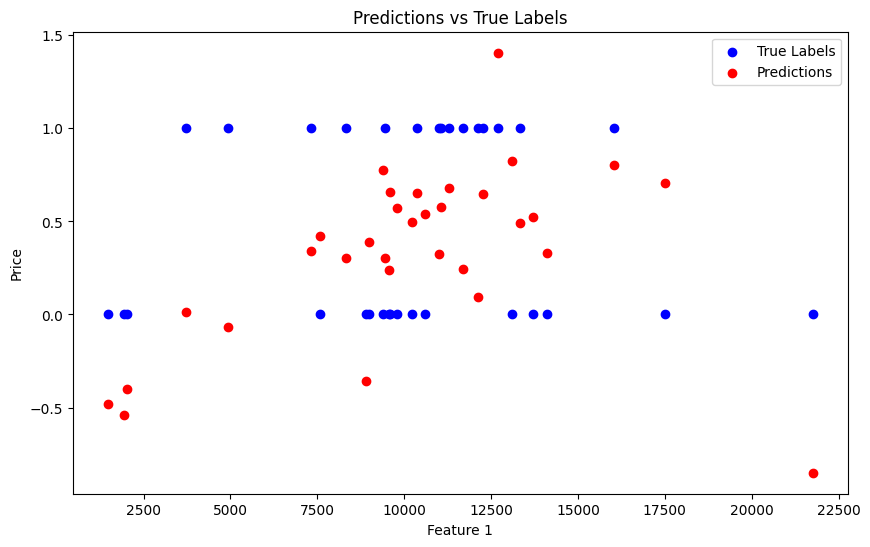

In [25]:
import matplotlib.pyplot as plt

# Fungsi untuk memvisualisasikan prediksi dan label sebenarnya
def visualize_predictions(model, test_iter):
    model.eval()  # Mengatur model ke mode evaluasi
    with torch.no_grad():
        for X_batch, y_batch in test_iter:
            y_pred = model(X_batch)
            plt.figure(figsize=(10, 6))
            plt.scatter(X_batch[:, 0], y_batch, color='b', label='True Labels')
            plt.scatter(X_batch[:, 0], y_pred, color='r', label='Predictions')
            plt.xlabel('Feature 1')
            plt.ylabel('Price')
            plt.title('Predictions vs True Labels')
            plt.legend()
            plt.show()
            break  # Hanya visualisasikan satu batch untuk tujuan demonstrasi

# Memanggil fungsi untuk memvisualisasikan prediksi
visualize_predictions(net, test_iter)

